# Gradient Descent

This Jupyter Notebook is dedicated to understanding and implementing the gradient descent algorithm.

The following packages are required to run the attached code:

- [Math](https://docs.python.org/3/library/math.html)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

## Description of the Algorithm:

***
Gradient descent is a generic method for optimization that searches for an optimial solution by iteratively moving along a function in search of better solutions. 

Here is an image that demonstrates the algorithm: 

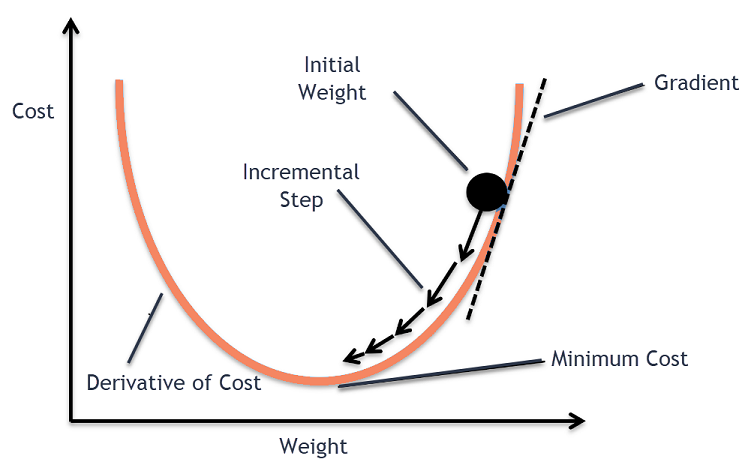

As you can see, you start with some initial value and move closer and closer to a local minimum with each "step".

Mathematically, this means that gradient descent attempts minimize f(x) for x ∈ ℝ, f(x) differentiable.

With perceptron, we saw that we can train a single neurons by iteratively updating our weights and bias. Gradient descent is one simple yet effective way to train a neural network.

Notably, this algorithm will allow us to find a local minimum, but is not guaranteed to find the global minimum (these can be far different!).

Here is an example:

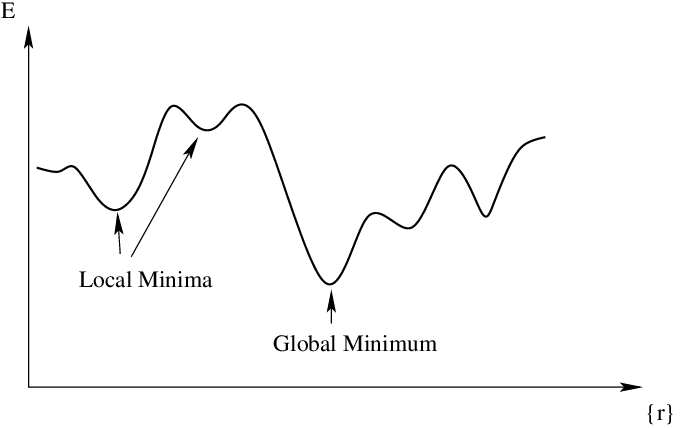

Image 1 from [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)

Image 2 from [Analytics Yogi](https://vitalflux.com/local-global-maxima-minima-explained-examples/#google_vignette)

***

## The Algorithm:

***
1. Get a starting point: To begin, we just need a first guess. Ideally this would be "close" to the global minimum, but sometimes we have no idea where that might be. Any x where f(x) exists will work. 

2. Compute the gradient: The gradient, or derivative for first order functions, will tell us the direction of the nearest local minimum. If the tangent line at a point has a positive slope, it means the function is increasing, so we'll want to go to the left to get to a "lower point". If the tangent line at a point is negative, it means it's decreasing as we move to the right, so we will go to the right.

3. Select a step size / learning rate: This is the distance we want to move (after being multiplied by the gradient) at each iteration. A larger step size will have a more drastic move while smaller ones will take a more precise step towards the local minimum. Different functions will have different "best" step sizes, we can make predictions based on the functions, but oftentimes, experimenting with the data will get you to a good result.

4. Select a stop condition: Over infinitely many iterations, gradient descent will get you exactly to the local minimum if you have an appropriate step size, but as the gradient gets closer and closer to 0, we may want to introduce a stopping condition so our code doesn't run forever. This can look like a number of iterations to do descent or a threshold for the gradient or the change in the cost function at each iteration. 

5. Repeat 2-4 taking the initial starting point to now be the previous point - the gradient * step size.
***

## Setting Up:

***
Import the necessary modules.
***

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl
import numpy as np
import seaborn as sns
import math

## Gradient Descent on a Single Variable Function:

***
Perform gradient descent on x^4 -3x^3 + 2x^2. Note that this function has local minima at x = 0 and x = 1.64.
***

In [19]:
# Define the initial function.
def f(x):
    return x**4  - 3 * x**3 + 2 * x**2

# Define its derivative.
def f_prime(x):
    return 4 * x**3 - 9 * x**2 + 4 * x

# Perform gradient descent.
def g_descent(f_prime, alpha = 0.8, w_0 = 5.0, max_iter = 1000):
    '''
    Inputs:
    - f_prime: A function representing the derivative of the objective function. 
    - alpha: The learning rate or step size used in the gradient descent algorithm.
    - w_0: The initial value of the variable of interest where the gradient descent starts.
    - max_iter: The maximum number of iterations allowed for the gradient descent algorithm to converge.

    Output:
    - W[-1], the final approximate solution found by the gradient descent algorithm.
    
    Objective:
    Perform gradient descent. 
    '''
    # Set the iterations and initialize a list to keep track of our approximations. 
    W = [w_0]
    i = 0

    #Continue until the max iterations or the gradeint is near 0.
    while abs(f_prime(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*f_prime(W[-1])
        W.append(w_new)
        i += 1

    # Return the final approximation.
    W = np.array(W)
    return W[-1], W

# Perform gradient descent.
l_min, W = g_descent(f_prime, 0.01)
print(f"The minimum is approximately {round(l_min,2)}")

The minimum is approximately 1.64


***
Plot the function.
***

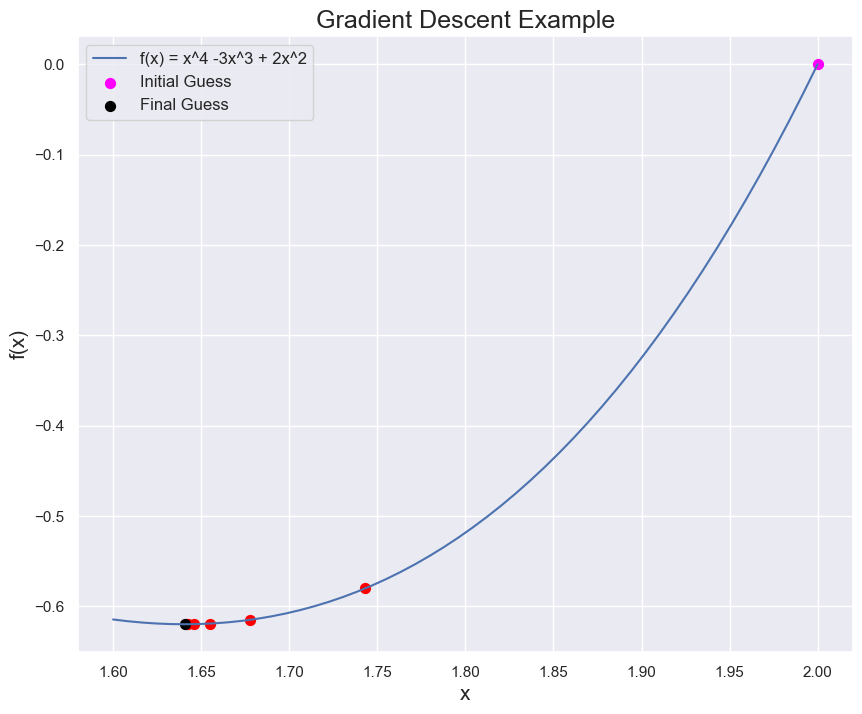

In [4]:
# Perform gradient descent with initial value 2.
l_min, W = g_descent(f_prime, 0.01, 2)

# Set the theme.
sns.set_theme()

# Define domain variables for the graph.
domain = np.linspace(1.6, 2, 50)

# Plot the function f(x).
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = x^4 -3x^3 + 2x^2")
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)

# Plot points.
step = math.floor(len(W)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W[step*i], f(W[step*i]), color = "magenta", s = 50, label = "Initial Guess")
    elif i == 7:
         plt.scatter(W[step*i], f(W[step*i]), color = "black", s = 50, label = "Final Guess")
    else:
        plt.scatter(W[step*i], f(W[step*i]), color = "red", s = 50)

# Include a title and legend.
plt.legend(fontsize = 12, loc = "upper left")
plt.title("Gradient Descent Example", fontsize = 18)

plt.show()

***
Note that starting with different initial values can, in fact, change the local minimum found.
***

In [5]:
# Set x values.
x1 = -1
x2 = 1
x3 = 2

# Perform gradient descent at the different initial values. 
g1, W1 = g_descent(f_prime, 0.01, x1)
g2, W2 = g_descent(f_prime, 0.01, x2)
g3, W3 = g_descent(f_prime, 0.01, x3)

# Print the resulting minima.
print(f'Local minimum at x = {round(g1,2)} for x_0 = {x1}')
print(f'Local minimum at x = {round(g2,2)} for x_0 = {x2}')
print(f'Local minimum at x = {round(g3,2)} for x_0 = {x3}')

Local minimum at x = -0.0 for x_0 = -1
Local minimum at x = 1.64 for x_0 = 1
Local minimum at x = 1.64 for x_0 = 2


***
Show the above in a plot.
***

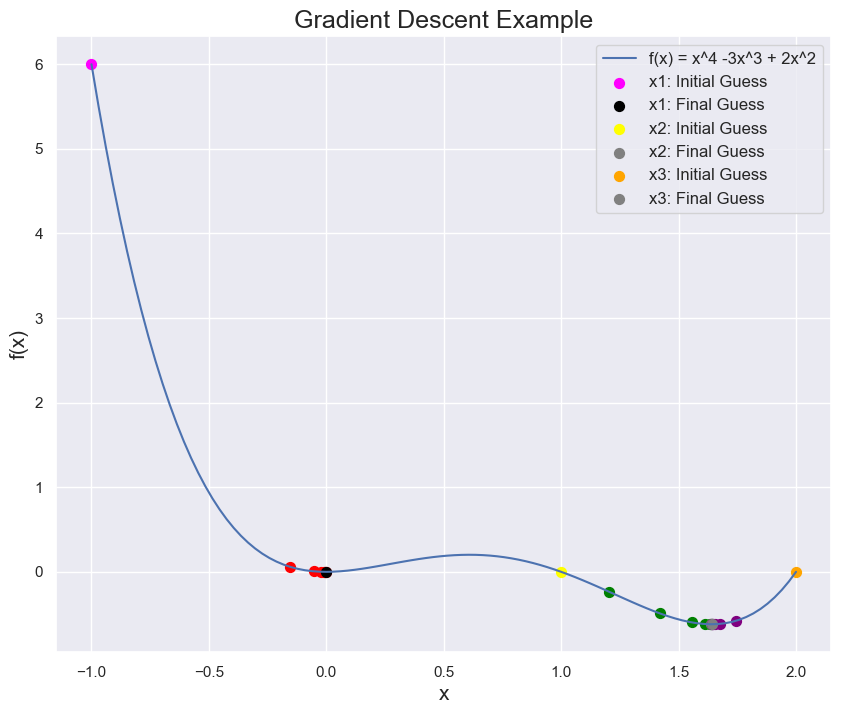

In [6]:
# Set the theme.
sns.set_theme()

# Define domain variables for the graph.
domain = np.linspace(-1, 2, 100)

# Plot the function f(x).
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(x) = x^4 -3x^3 + 2x^2")
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)

# Plot points for x1.
step = math.floor(len(W1)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W1[step*i], f(W1[step*i]), color = "magenta", s = 50, label = "x1: Initial Guess")
    elif i == 7:
         plt.scatter(W1[step*i], f(W1[step*i]), color = "black", s = 50, label = "x1: Final Guess")
    else:
        plt.scatter(W1[step*i], f(W1[step*i]), color = "red", s = 50)

# Plot points for x2.
step = math.floor(len(W2)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W2[step*i], f(W2[step*i]), color = "yellow", s = 50, label = "x2: Initial Guess")
    elif i == 7:
         plt.scatter(W2[step*i], f(W2[step*i]), color = "grey", s = 50, label = "x2: Final Guess")
    else:
        plt.scatter(W2[step*i], f(W2[step*i]), color = "green", s = 50)

# Plot points for x3.
step = math.floor(len(W3)/8)
for i in range(8):
    if i == 0:
        plt.scatter(W3[step*i], f(W3[step*i]), color = "orange", s = 50, label = "x3: Initial Guess")
    elif i == 7:
         plt.scatter(W3[step*i], f(W3[step*i]), color = "grey", s = 50, label = "x3: Final Guess")
    else:
        plt.scatter(W3[step*i], f(W3[step*i]), color = "purple", s = 50)


plt.legend(fontsize = 12, loc = "upper right")
plt.title("Gradient Descent Example", fontsize = 18)

plt.show()

***
Note that for a function like this, the default step size, 0.8, is completely unreasonable because we get derivatives with very large magnitudes. It's possible, in a case like this, for it to take a long time for you to get to a local minimum because the steps are huge.
***

## Gradient Descent on a More Complex Function:

***
The algorithm works very similarly for multi-variate functions. Now, we just perform gradient descent induvidually in each new dimension. I use g(x) = (x_0-5)^2 + (x_1+2)^2, which has a local (and global) minimum at (5, -2).
***

In [3]:
# Define the initial function.
def g(x0, x1):
    return (x0-5) ** 2 + (x1 + 2) ** 2

# Calculate its gradient.
def g_prime(w):
    grad = [2*(w[0]-5), 2*(w[1]+2)]
    return np.array(grad)

# Perform gradient descent.
def gradient_descent(g_prime, new_x, alpha = 0.8, max_iter = 1000):
    '''
    Inputs:
    - f_prime: A function representing the gradient of the objective function. 
    - alpha: The learning rate or step size used in the gradient descent algorithm.
    - w_0: The initial value of the variable of interest where the gradient descent starts.
    - max_iter: The maximum number of iterations allowed for the gradient descent algorithm to converge.

    Output:
    - W[-1]: the final approximate solution found by the gradient descent algorithm.
    
    Objective:
    Perform gradient descent. 
    '''
    i = 0
    W = [new_x]
    # Go until the gradient is small or you hit the. max iterations.
    while i < max_iter and np.linalg.norm(g_prime(new_x)) > 0.001:
        new_x = new_x - alpha*g_prime(new_x)
        i += 1
        W.append(new_x)
    return W, W[-1]

# Print the results. 
W, x_vector = gradient_descent(g_prime, np.array([10.0, -5.0]), alpha = 0.1, max_iter=1000)
print(f'Local minimum at x = {round(x_vector[0],2)}, {round(x_vector[1],2)} for x = 10,-5')


Local minimum at x = 5.0, -2.0 for x = 10,-5


***
Let's plot this to see how it looks.
***

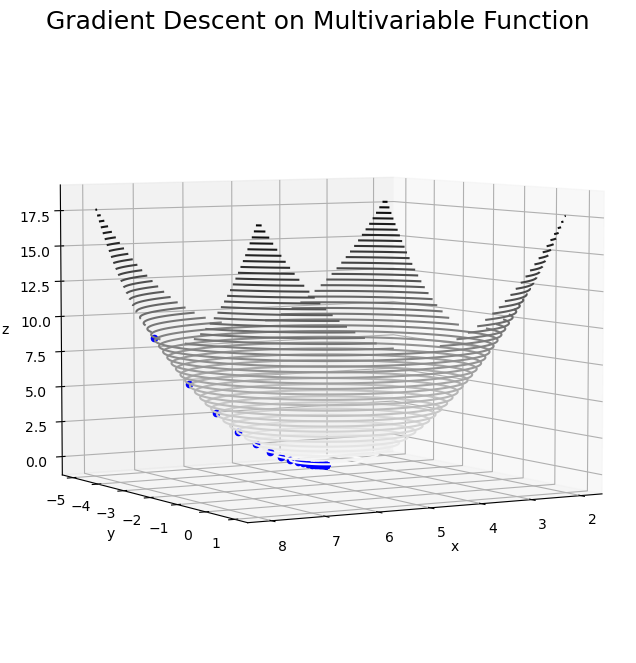

In [4]:
# Define the range of x and y values. 
x = np.linspace(2, 8, 300)
y = np.linspace(-5, 1, 300)

# Compute the values of the function.
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

# Create the 3D plot.
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the points.
for i in range(len(W))[3:len(W)-1]: ax.scatter3D([W[i][0]], [W[i][1]], [g(W[i][0], W[i][1])], color = "blue")

# Set the view. 
ax.view_init(5, 60)

# Set a title. 
plt.title("Gradient Descent on Multivariable Function", fontsize = 18)

plt.show()

## Finding the Right Learning Rate. 

As we saw, the learning rate is important to getting to a local minimum efficiently, so choosing the right learning rate is important!

Here is an example of how different learning rates change gradient descent. 

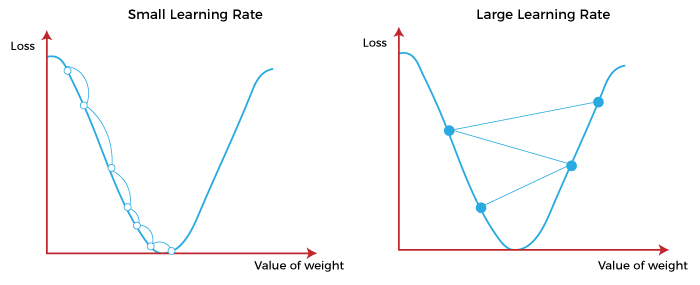

There is no one perfect strategy for identifying the "right" learning rate, but we can look at how long it takes us to get to a derivative that is less than 0.001. We will do this below!


Image source [JavaTPoint](https://www.javatpoint.com/gradient-descent-in-machine-learning).

In [17]:
# Set possible learning rates. 
possible_lr = [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.0075, 0.001, 0.0001]

# Create a list to hold the number of iterations for each learning rate.
iterations = []

# Modify gradient descent to return the number of iterations.
def gradient_descent_iters(g_prime, new_x, alpha = 0.8, max_iter = 1000):
    '''
    Inputs:
    - f_prime: A function representing the gradient of the objective function. 
    - alpha: The learning rate or step size used in the gradient descent algorithm.
    - w_0: The initial value of the variable of interest where the gradient descent starts.
    - max_iter: The maximum number of iterations allowed for the gradient descent algorithm to converge.

    Output:
    - i: the number of iterations to get to a derivative of 0.001 or 1000 if it hits the max iterations.
    
    Objective:
    Perform gradient descent. 
    '''
    i = 0
    W = [new_x]
    # Go until the gradient is small or you hit the. max iterations.
    while i < max_iter and np.linalg.norm(g_prime(new_x)) > 0.001:
        new_x = new_x - alpha*g_prime(new_x)
        i += 1
        W.append(new_x)
    return i

# Perform gradient descent for each learning rate.
for lr in possible_lr:
    iter = gradient_descent_iters(g_prime, np.array([30.0, -7.5]), alpha = lr, max_iter=1000)
    iterations.append(iter)
    
# Get the minimum and maximum number of iterations. 
min_iter = min(iterations)

# Print the results. 
min_idx = iterations.index(min_iter)
print(f"The best learning rate is {possible_lr[min_idx]} with {min_iter} iteration.")


The best learning rate is 0.5 with 1 iteration.


***
Let's plot the results for clarity.
***

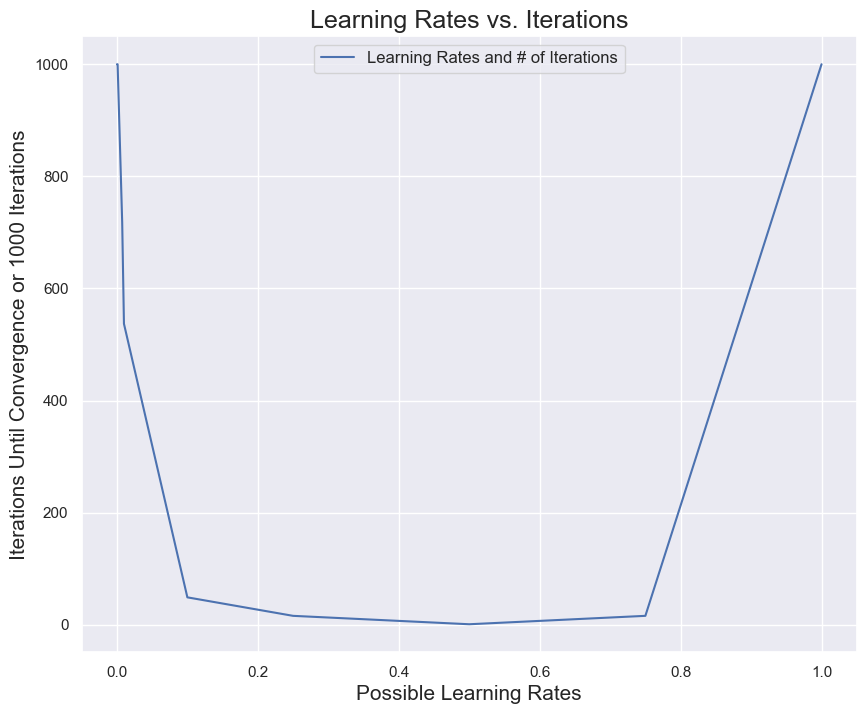

In [22]:
# Set the theme.
sns.set_theme()

# Define domain variables for the graph.
domain = np.linspace(min(possible_lr), max(possible_lr), 50)

# Set the figure size. 
plt.figure(figsize = (10, 8))

# Plot the points. 
plt.plot(possible_lr, iterations, label = "Learning Rates and # of Iterations")
plt.xlabel("Possible Learning Rates", fontsize = 15)
plt.ylabel("Iterations Until Convergence or 1000 Iterations", fontsize = 15)

# Include a title and legend.
plt.legend(fontsize = 12, loc = "upper center")
plt.title("Learning Rates vs. Iterations", fontsize = 18)

plt.show()

As we can see, a small change in the learning rate can take us from not getting close to converging within 1,000 iterations to getting there in just one iteration. 

## Conclusions:

***
The gradient descent algorithm is a fundamental optimization technique used in machine learning. We will use it extensively and it is essential for many machine learning algorithms. 

1. Convergence to Local Minima: Gradient descent aims to find the local minimum of a cost function. However, it is important to note that it may not always converge to the global minimum. The final solution obtained depends on the initial values and the shape of the cost function.

2. Learning Rate Selection: The learning rate is a crucial hyperparameter in gradient descent. Choosing an appropriate learning rate is essential for the algorithm to converge efficiently. A learning rate that is too large may cause overshooting, while a learning rate that is too small may result in slow convergence.

3. Sensitivity to Initial Values: The starting point of gradient descent can significantly impact the final solution. Different initial values can lead to different local minima. It is important to experiment with different initial values to find the optimal solution.

Gradient descent is a powerful optimization algorithm used in machine learning. We will get to see it in practice in the next notebook!
***